# Instrucciones del Proyecto

Instrucciones del proyecto
* Carga los datos.
* Preprocesa los datos, si es necesario.
* Realiza un análisis exploratorio de datos y haz tu conclusión sobre el desequilibrio de clases.
* Realiza el preprocesamiento de datos para el modelado.
* Entrena al menos tres modelos diferentes para el conjunto de datos de entrenamiento.
* Prueba los modelos para el conjunto de datos de prueba.
* Escribe algunas reseñas y clasifícalas con todos los modelos.
* Busca las diferencias entre los resultados de las pruebas de los modelos en los dos puntos anteriores. Intenta explicarlas.
* Muestra tus hallazgos.

# Carga de Librerías

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import re
import spacy

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

import sklearn.metrics as metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.corpus import stopwords as stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

#BERT
from transformers import BertTokenizer, BertModel, BertConfig
import torch
import math


plt.style.use('seaborn-v0_8')

c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\omarh\AppData\Roami

In [3]:
# usando progress_apply https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

Instrucciones del proyecto
* Carga los datos.
* Preprocesa los datos, si es necesario.
* Realiza un análisis exploratorio de datos y haz tu conclusión sobre el desequilibrio de clases.
* Realiza el preprocesamiento de datos para el modelado.
* Entrena al menos tres modelos diferentes para el conjunto de datos de entrenamiento.
* Prueba los modelos para el conjunto de datos de prueba.
* Escribe algunas reseñas y clasifícalas con todos los modelos.
* Busca las diferencias entre los resultados de las pruebas de los modelos en los dos puntos anteriores. Intenta explicarlas.
* Muestra tus hallazgos.

# Carga de datos

In [4]:
df_reviews = pd.read_csv('C:/Users/omarh/Documents/Tripleten/Proyectos/S14/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
# df_reviews = pd.read_csv(r'C:\Users\ramos\Documents\Tripleten\datasets\datasets\imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

# Preprocesamiento de datos

In [5]:
#Mostrando estructura y estadística descriptiva del dataset
display(df_reviews.describe())
display(df_reviews.info())



,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,47329.0,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,25562.917323,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,83670.039163,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.0,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,827.0,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3197.0,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,13974.0,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1739448.0,10.000000,1.000000,12499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

None

In [6]:
#Consultando filas nulas
df_reviews[df_reviews.isna().any(axis=1)]

#Eliminando filas nulas
df_reviews.dropna(inplace=True)

* **Se identificaron 2 filas con valores nulos en average_rating y votes. Dado que representan <0.005% del dataset, se eliminaron sin afectar la distribución.**

In [7]:
#Comprobando eliminación de nulos
df_reviews.isna().any().sum()

np.int64(0)

In [8]:
# Normalizando tipos de datos en columnas
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47329 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47329 non-null  object 
 1   title_type       47329 non-null  object 
 2   primary_title    47329 non-null  object 
 3   original_title   47329 non-null  object 
 4   start_year       47329 non-null  int64  
 5   end_year         47329 non-null  object 
 6   runtime_minutes  47329 non-null  object 
 7   is_adult         47329 non-null  int64  
 8   genres           47329 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47329 non-null  object 
 12  rating           47329 non-null  int64  
 13  sp               47329 non-null  object 
 14  pos              47329 non-null  int64  
 15  ds_part          47329 non-null  object 
 16  idx              47329 non-null  int64  
dtypes: Int64(1), floa

Los datos no requieren normalización de tipos de datos en columnas debido a que ya vienen "pre- tratados"

# EDA

In [9]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47329.000000,47329.000000,47329.000000,47329.0,47329.000000,47329.000000,47329.000000
mean,1989.630882,0.001733,5.998278,25562.917323,5.484439,0.498933,6279.826808
std,19.600702,0.041588,1.494289,83670.039163,3.473083,0.500004,3605.724280
min,1894.000000,0.000000,1.400000,9.0,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,827.0,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3197.0,4.000000,0.000000,6300.000000
75%,2004.000000,0.000000,7.100000,13974.0,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1739448.0,10.000000,1.000000,12499.000000


* Año mínimo: 1894
* Año máximo: 2010
* Evaluación media: 5.99/10
* Evaluación mínima y máxima : 1 - 10 

In [10]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47329 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47329 non-null  object 
 1   title_type       47329 non-null  object 
 2   primary_title    47329 non-null  object 
 3   original_title   47329 non-null  object 
 4   start_year       47329 non-null  int64  
 5   end_year         47329 non-null  object 
 6   runtime_minutes  47329 non-null  object 
 7   is_adult         47329 non-null  int64  
 8   genres           47329 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47329 non-null  object 
 12  rating           47329 non-null  int64  
 13  sp               47329 non-null  object 
 14  pos              47329 non-null  int64  
 15  ds_part          47329 non-null  object 
 16  idx              47329 non-null  int64  
dtypes: Int64(1), floa

In [11]:
df_reviews['review'].str.len()

0         715
1        1080
2        1016
3        1045
4        1085
         ... 
47326    1167
47327     626
47328    1149
47329    1817
47330     489
Name: review, Length: 47329, dtype: int64

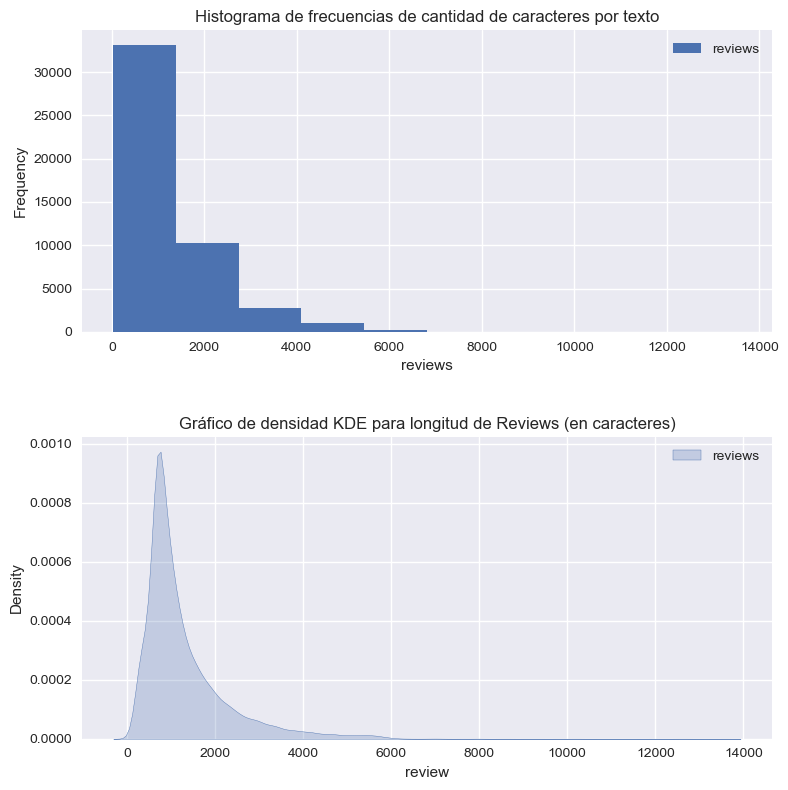

In [12]:
review_len = df_reviews['review'].str.len()
#Gráficando histograma de cantidad de caracteres por reseña 
fig , axs = plt.subplots(2,1 , figsize=(8,8))


# plt.subplots_adjust(hspace=0.4)


ax = axs[0]
review_len.hist(label ='reviews',ax = ax)
ax.legend()
ax.set_xlabel('reviews')
ax.set_ylabel('Frequency')
ax.set_title('Histograma de frecuencias de cantidad de caracteres por texto')


ax = axs[1]
sns.kdeplot(review_len, fill=True, label='reviews', ax= ax)
ax.legend()
ax.set_title('Gráfico de densidad KDE para longitud de Reviews (en caracteres)')


plt.tight_layout()
plt.subplots_adjust(hspace=0.35)

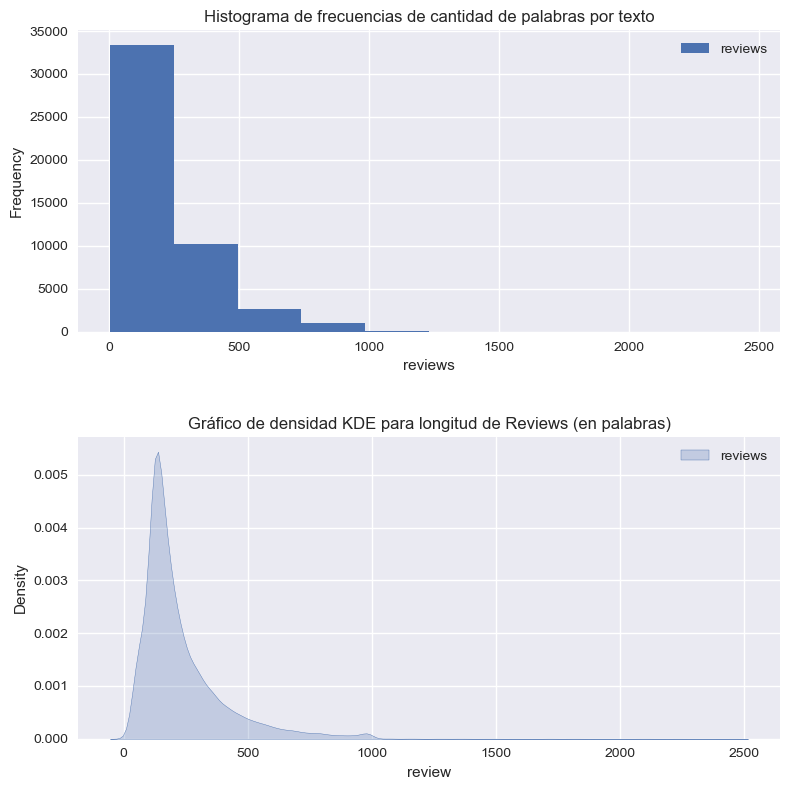

In [13]:
review_words = df_reviews['review'].str.split().str.len()
#Gráficando histograma de cantidad de palabras por reseña 
fig , axs = plt.subplots(2,1 , figsize=(8,8))



ax = axs[0]
review_words.hist(label ='reviews',ax = ax)
ax.legend()
ax.set_xlabel('reviews')
ax.set_ylabel('Frequency')
ax.set_title('Histograma de frecuencias de cantidad de palabras por texto')


ax = axs[1]
sns.kdeplot(review_words, fill=True, label='reviews', ax= ax)
ax.legend()
ax.set_title('Gráfico de densidad KDE para longitud de Reviews (en palabras)')


plt.tight_layout()
plt.subplots_adjust(hspace=0.35)

Podemos observar que:

**Por cantidad de caracteres:**
* La mayor parte de las reseñas tienen entre 0 y 1500 caracteres
* Se tiene una mayor densisdad en menos de 2000 caracteres para los reviews
* Se tienen reviews con hasta 6000 caracteres sin embargo son muy pocos en relación al total

**Por cantidad de palabras:**
* La mayor parte de las reseñas tiene entre 0 y 250 palabras
* Se tiene una mayor densisdad en menos de 250 palabras para los reviews
* Se tienen reviews con hasta 1000 palabras sin embargo son muy pocos en relación al total

In [14]:
df_reviews['ds_part']

0        train
1        train
2         test
3         test
4         test
         ...  
47326     test
47327     test
47328     test
47329     test
47330     test
Name: ds_part, Length: 47329, dtype: object

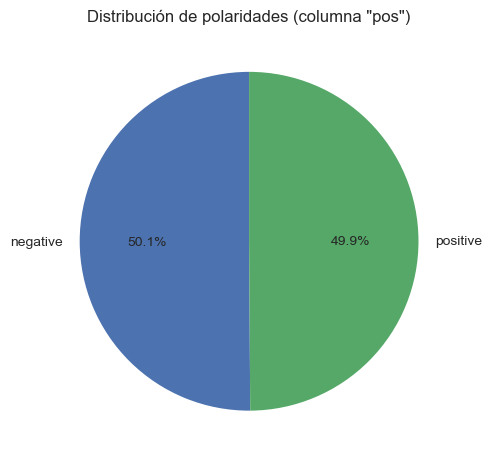

El porcentaje de reseñas positivas es del 49.9% 


In [15]:
counts = df_reviews['pos'].value_counts()
labels = ['negative' if x ==0 else 'positive' for x in counts.index]

plt.pie(counts, labels = labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de polaridades (columna "pos")')
plt.show()
ratio=round(len(df_reviews[df_reviews['pos']==1])/ len(df_reviews['pos']),3) *100
print(f'El porcentaje de reseñas positivas es del {ratio}% ' )

busquemos el no de reseñas por año por polaridad
+ KDE por polaridad

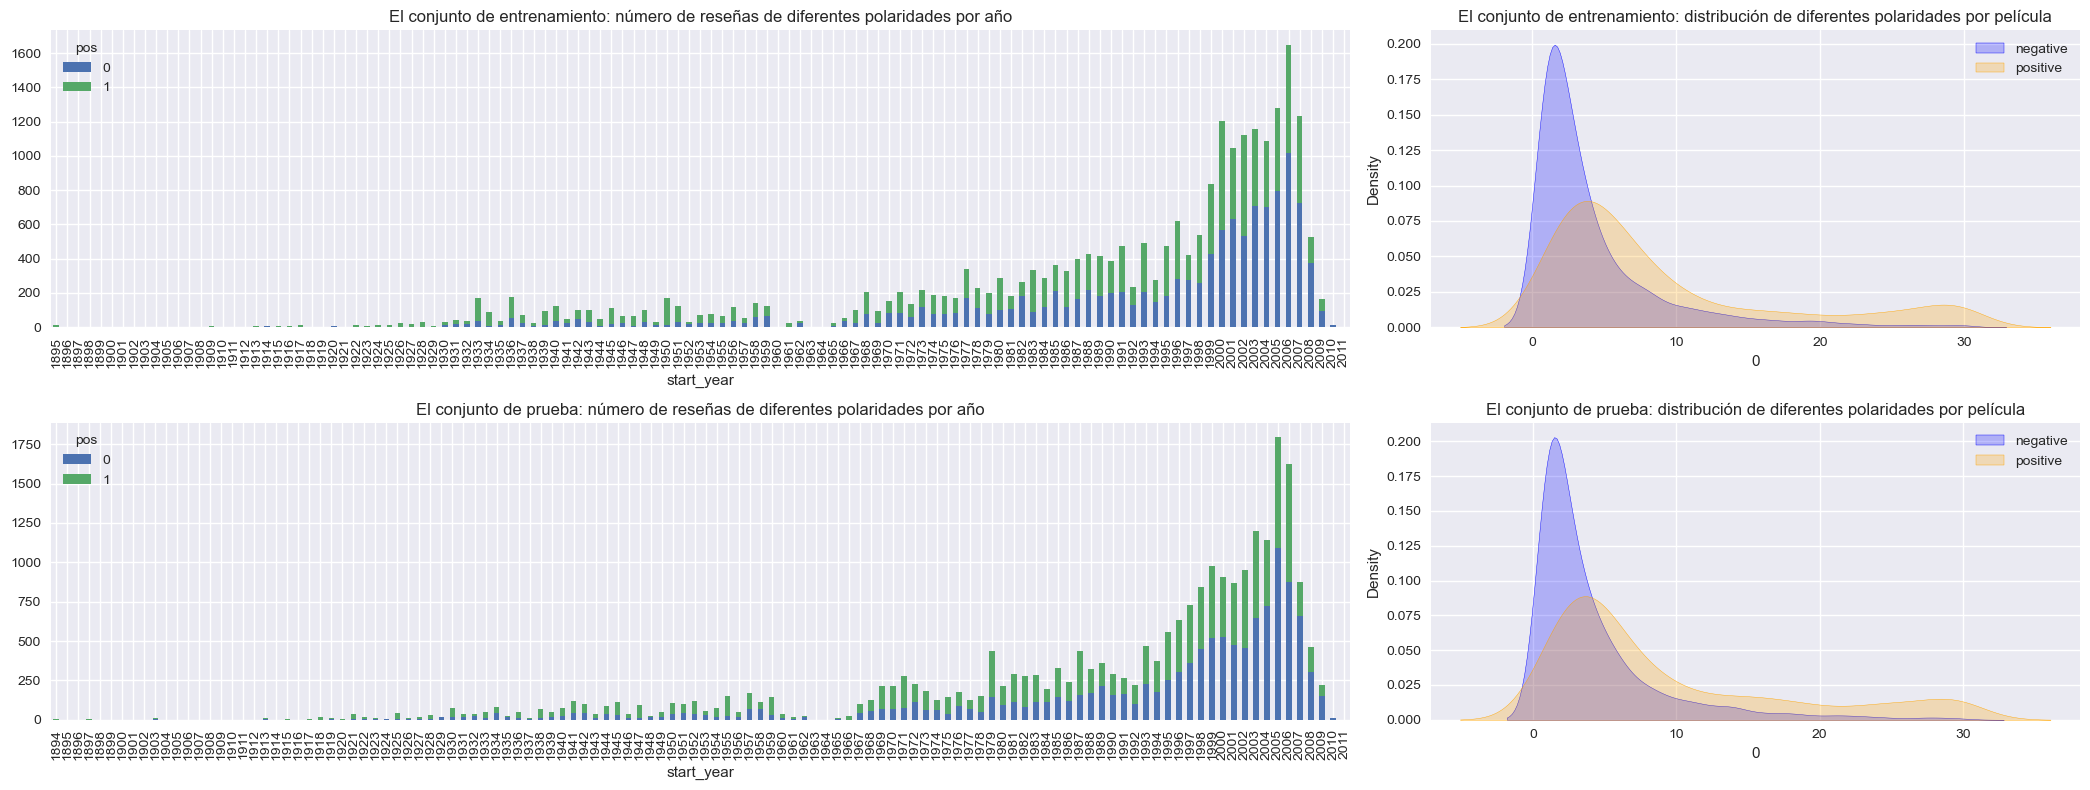

In [16]:
fig, axs = plt.subplots(2,2, figsize=(21,8),  gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

#
ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year','pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2012))).fillna(0)

dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

#
ax = axs[0][1]
dft = df_reviews.query('ds_part == "train"').groupby(['tconst','pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color = 'blue' , fill =True , label='negative', ax=ax)
sns.kdeplot(dft[1], color='orange',label ='positive', fill = True , ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

#----
ax = axs[1][0]
dft = df_reviews.query('ds_part == "test"').groupby(['start_year','pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2012))).fillna(0)


dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

#
ax = axs[1][1]
dft = df_reviews.query('ds_part == "test"').groupby(['tconst','pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', fill=True, label='negative', ax=ax)
sns.kdeplot(dft[1], color='orange', fill=True, label='positive', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()


## Conclusiones EDA

Podemos observar que : 
* Los datos disponibles son desde 1895 hasta 2010
* La cantidad de reseñas ha ido aumentando progresivamente con el paso de los años, seguramente por el acceso a internet, así como la integración de más usuarios en estas prácticas
* Las reseñas positivas y negativas aparecen más o menos en proporciones similares, se tienen algunos años donde predominan, sin embargo esto se puede deber a estrenos de películas muy taquilleras o relevantes para la historia del cine (Star wars, LOTR,etc.)


---------

**Los gráficos nos muestran que:**

* **La distribución de reseñas positivas y negativas en todo el dataset está balanceada casi a la perfección**


El gráfico KDE nos muestra que las reseñas por película arrojan un desequlibrio notable, veamos por grupo.
* **Podemos observar que las distribuciones de los datos son similares para los datos de prueba y entrenamiento**

**Las reseñas negativas:**
* Presentan variabilidad "baja" respecto a las reseñas positivas
* tienden a concentrarse en <5 por película, un pequeño grupo presenta entre 8 y 10


**Las reseñas positivas:**
* Presentan mayor variabilidad en relación a las reseñas negativas
* Los usuarios participan mayormente en reseñas positivas, presentando en su mayoría entre 3-6 reseñas
* Presentan una distribución más amplia, con una cola derecha larga que llega hasta 30 reseñas.


**El dataset se encuenta prácticamente balanceado (50/50), por lo que no será necesario aplicar técnicas de remuestreo.**



-----------

# Preprocesamiento para modelos

## Normalización

Todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [17]:
df_reviews['review'].iloc[1]

'How the hell did they get this made?! Presenting itself as a caper comedy, the misbegotten "$" is essentially two hours of people mumbling sentence fragments. The usually dependable Warren Beatty looks drunk, and the usually hilarious Goldie Hawn acts like she\'s on depressants. As for Gert Frobe, his most famous role - Goldfinger - was infinitely more admirable than his character here. Not even the guy with the champagne bottle of LSD can save this litany of worthlessness. Am I comparing this movie to "Plan 9 from Outer Space"? I wouldn\'t do such a thing even if someone paid me. "P9FOS" was idiotically made but ended up hilarious; this was idiotically made and causes you to feel like your brain just melted out of your ears. Warren Beatty and Goldie Hawn made up for this when they co-starred in "Shampoo", but then they co-starred in the dreadful "Town & Country". Maybe they just shouldn\'t co-star in movies. All in all, I would rather have my skin torn off than have to watch this aga

In [ ]:
#Creando patron regex para eliminar signos de puntuación y dígitos
pattern = r'[^a-zA-Z\s]'
#aplicando patron mediante lambda
df_reviews['review'] = df_reviews['review'].apply(lambda x : re.sub(pattern, ' ',x).strip().lower()  )
# aplicando regex para hacer todos los espacios en blanco uno solo
df_reviews['review'] = df_reviews['review'].apply(lambda x : re.sub(r'\s +', " ", x))


In [19]:
df_reviews['review'].iloc[1]

'how the hell did they get this made presenting itself as a caper comedy the misbegotten is essentially two hours of people mumbling sentence fragments the usually dependable warren beatty looks drunk and the usually hilarious goldie hawn acts like she s on depressants as for gert frobe his most famous role - goldfinger - was infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness am i comparing this movie to plan from outer space i wouldn t do such a thing even if someone paid me p fos was idiotically made but ended up hilarious this was idiotically made and causes you to feel like your brain just melted out of your ears warren beatty and goldie hawn made up for this when they co-starred in shampoo but then they co-starred in the dreadful town country maybe they just shouldn t co-star in movies all in all i would rather have my skin torn off than have to watch this again awful maybe they should remake it

## División de datos de entrenamiento y prueba

Los datos ya están divididos en entrenamiento/prueba, el indicador es "ds_part"

In [20]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)


(23796, 17)
(23533, 17)


# Función de evaluación

Vamos a evaluar los modelos con las siguientes métricas:
* F1
* ROC
* PRC



In [21]:
train_target

0        0
1        0
7        0
8        0
9        0
        ..
47253    1
47254    1
47255    1
47256    1
47257    0
Name: pos, Length: 23796, dtype: int64

In [22]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    eval_stats= {}

    fig, axs = plt.subplots(1,3, figsize = (20,6))
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
     
     
     eval_stats[type]= {}

     pred_target = model.predict(features)
     pred_proba = model.predict_proba(features)[:,1]


     #Exactitud
     eval_stats[type]['Exactitud'] = metrics.accuracy_score(target, pred_target)

    #F1 Score
     eval_stats[type]['F1'] = metrics.f1_score(target,pred_target)

    #F1 pred_proba
     f1_thresholds = np.arange(0,1.01, 0.05)
     f1_scores = [metrics.f1_score(target, pred_proba >= threshold) for threshold in f1_thresholds ]

     #ROC
     fpr,  tpr, roc_thresholds = metrics.roc_curve(target,pred_proba)
     roc_auc = metrics.roc_auc_score(target,pred_proba)
     eval_stats[type]['ROC AUC'] = roc_auc
     
     #PRC    
     precision, recall , pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
     aps = metrics.average_precision_score(target,pred_proba)
     eval_stats[type]['APS'] = aps
     



     #Graficando métricas------

     if type == 'train':
       color = 'blue'
     else:
       color = 'green'

     #Valor F1 ************************
     #-----------------------
     ax = axs[0]
     max_f1_score_idx = np.argmax(f1_scores)
     ax.plot(f1_thresholds , f1_scores, color = color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f} ' )
     
     
     #Graficando cruces de umbrales
     for threshold in(0.2, 0.4, 0.5, 0.6, 0.8):
        closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
        marker_color = 'orange' if threshold != 0.5 else 'red'
        ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color = marker_color, marker= 'X', markersize = 7)
     ax.set_xlim([-.02, 1.02])
     ax.set_ylim([-.02, 1.02])
     ax.set_xlabel('Threshold')
     ax.set_ylabel('F1')
     ax.legend(loc='lower center')
     ax.set_title(f'Valor F1')
     #-----------------------



     #ROC AUC CURVE  ***************************
     ax = axs[1]
     ax.plot(fpr, tpr, color = color, label=f'{type}, ROC_AUC={roc_auc:.2f}')
     #Graficando cruces de umbrales
     for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
       closest_value_idx = np.argmin(np.abs(roc_thresholds - threshold))
       marker_color = 'orange' if threshold != 0.5 else 'red'
       ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize = 7 )
     
     ax.plot([0,1], [0,1], color='grey', linestyle='--')
     ax.set_xlim([-.02,1.02])
     ax.set_ylim([-.02, 1.02])
     ax.set_xlabel('FPR')
     ax.set_ylabel('TPR')
     ax.legend(loc='lower center')
     ax.set_title(f'Curva ROC')

     #-------
     
     #PRC (Precision recall curve)**********************
     ax=axs[2]
     plt.plot(recall, precision, color= color, label=f'{type}, AP={aps:.2f}')
     #Graficando cruces de umbrales
     for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
       closest_value_idx= np.argmin(np.abs(pr_thresholds - threshold))
       marker_color = 'orange' if threshold !=0.5 else 'red'
       ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
     ax.set_xlim([-.02,1.02])
     ax.set_ylim([-.02, 1.02])
     ax.set_xlabel('Recall')
     ax.set_ylabel('Precision')
     ax.legend(loc='lower center')
     ax.set_title(f'Curva PRC')
     #-----------------
    

    # Creando dataframe a partir de diccionario de métricas
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=['Exactitud', 'F1', 'APS', 'ROC AUC'])

    display(df_eval_stats)
     


# Trabajando con Modelos

## Modelo 0 - Constante

Evaluación del DummyClassifier:


,train,test
Exactitud,0.50,0.50
F1,0.67,0.67
APS,0.50,0.50
ROC AUC,0.50,0.50


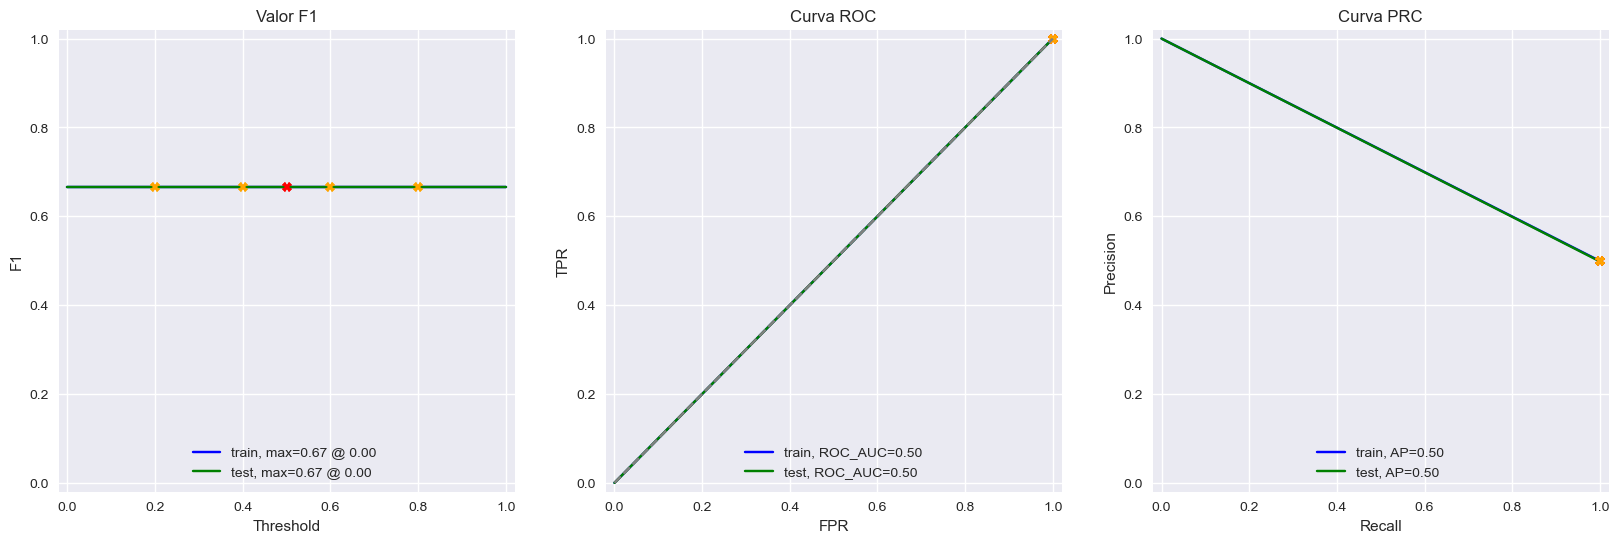

In [25]:
#Crear y entrenar el DummyClassifier
dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(df_reviews_train[['pos']], train_target)

#Evaluando el Dummy Classifier
print('Evaluación del DummyClassifier:')
# print(evaluate_model(dummy_clf, df_reviews_train[['pos']], train_target, df_reviews_test[['pos']], test_target    ))
evaluate_model(dummy_clf, df_reviews_train[['pos']], train_target, df_reviews_test[['pos']], test_target    )

## Modelo 1 NLTK, TF-IDF Y LR

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords as nltk_stopwords

### Tokenización y Lematización

In [27]:
#definiendo stop words
stop_words = list(nltk_stopwords.words('english'))
#Creando Lematizer object
lemmatizer = WordNetLemmatizer()

# Convirtiendo etiquetas POS treebank a POS WordNet
def get_wordnet(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #Por defecto, se considera como sustantivo
    
def preprocess_text_nltk(reviews):
    #Crear tokens
    tokens = word_tokenize(reviews)
    # Etiquetas POS para los tokens
    pos_tags = nltk.pos_tag(tokens) #[('The', 'DT'), ('movie', 'NN'), ('amazing', 'JJ'),...]
    #Cada elemento es(token, POS_tag)

    # return pos_tags
    #Creando lemmas
    lemmas= [lemmatizer.lemmatize(token, get_wordnet(pos)) for token, pos in pos_tags]
    

    return ' '.join(lemmas)

se utiliza POS tagging para mejorar la calidad de la lematización

In [28]:
#Porbando lematización con frase dummy
print(preprocess_text_nltk(df_reviews.iloc[1]['review']))

how the hell do they get this make present itself a a caper comedy the misbegotten be essentially two hour of people mumble sentence fragment the usually dependable warren beatty look drunk and the usually hilarious goldie hawn act like she s on depressant a for gert frobe his most famous role - goldfinger - be infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness be i compare this movie to plan from out space i wouldn t do such a thing even if someone pay me p fo be idiotically make but end up hilarious this be idiotically make and cause you to feel like your brain just melt out of your ear warren beatty and goldie hawn make up for this when they co-star in shampoo but then they co-star in the dreadful town country maybe they just shouldn t co-star in movie all in all i would rather have my skin tear off than have to watch this again awful maybe they should remake it with jackie chan then i would pay t

In [29]:
#Preprocesando (Lematizando) reviews con NLTK
df_reviews_train['review_nltk'] = df_reviews_train['review'].progress_apply(preprocess_text_nltk)
df_reviews_test['review_nltk'] =  df_reviews_test['review'].progress_apply(preprocess_text_nltk)

100%|██████████| 23533/23533 [03:45<00:00, 104.58it/s]


In [30]:
df_reviews_train['review_nltk'].iloc[1]

'how the hell do they get this make present itself a a caper comedy the misbegotten be essentially two hour of people mumble sentence fragment the usually dependable warren beatty look drunk and the usually hilarious goldie hawn act like she s on depressant a for gert frobe his most famous role - goldfinger - be infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness be i compare this movie to plan from out space i wouldn t do such a thing even if someone pay me p fo be idiotically make but end up hilarious this be idiotically make and cause you to feel like your brain just melt out of your ear warren beatty and goldie hawn make up for this when they co-star in shampoo but then they co-star in the dreadful town country maybe they just shouldn t co-star in movie all in all i would rather have my skin tear off than have to watch this again awful maybe they should remake it with jackie chan then i would pay 

### TF-IDF

In [31]:
#Inicializando Tf IDFVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 1000)

#Ajustando  y transformando mediante TF IDF vectorizer
train_features_tf_idf_nltk = tfidf_vectorizer.fit_transform(df_reviews_train['review_nltk'])
test_features_tf_idf_nltk = tfidf_vectorizer.transform(df_reviews_test['review_nltk'])

display(train_features_tf_idf_nltk.shape)
display(test_features_tf_idf_nltk.shape)


(23796, 1000)

(23533, 1000)

### Modelo LR

In [32]:
model_1 = LogisticRegression()
model_1.fit(train_features_tf_idf_nltk,train_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluación del modelo 1  - NÑTK , TF-IDF + LR


,train,test
Exactitud,0.87,0.86
F1,0.88,0.86
APS,0.94,0.93
ROC AUC,0.95,0.94


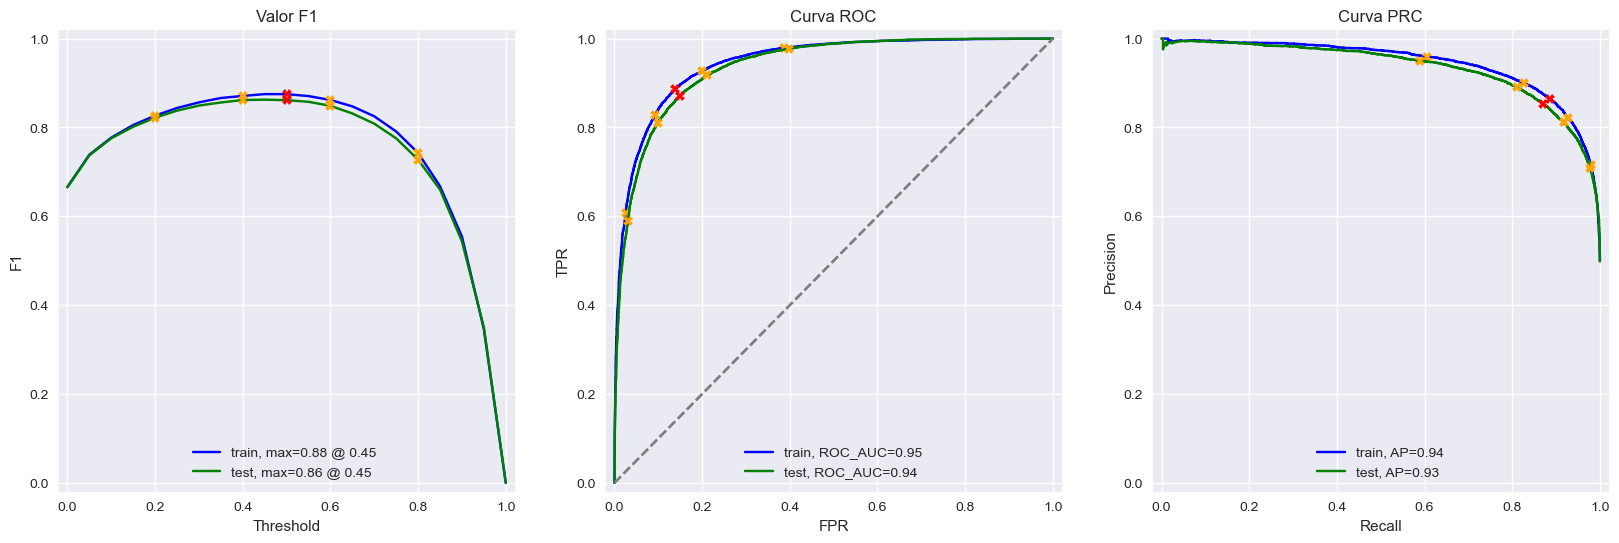

In [33]:
#Evaluando modelo 1 -NLTK , TF-IDF + LR
print('Evaluación del modelo 1  - NÑTK , TF-IDF + LR')
evaluate_model(model_1, train_features_tf_idf_nltk, train_target, test_features_tf_idf_nltk, test_target)

Podemos observar que:


**Exactitud:**
* La exactitud del modelo fue de .87 para el conjunto de entrenamiento y 0.86 para el conjunto de prueba, esto indica que el modelo "acertó" en el 87% de sus predicciones

**Valor F1:**
* El valor óptimo para el threshold es de 0.45
* El valor máximo para el conjunto de **entrenamiento** fue de 0.88 en un umbral de 0.45
* El valor máximo para el conjunto de **prueba** fue de 0.88 en un umbral de 0.45
* El modelo se comportó de manera excelente algeneralizar, tiene un equilibrio entre "cuantos de los datos positivos realmente fueron positivos" (Precision) y los verdaderos positivos detectados (Recall) 

**Valor APS:**
* Indica que el modelo ordena muy bien las observaciones según su probabilidad de ser positivas, manteniendo una alta precisión a lo largo de diferentes niveles de recall

**AUC ROC Curve:**
* Con valores de 0.95 y 0.94 respectivamente, podemos concluir que el modelo es muy bueno a la hora de separar (definir) las clases del target independientemente del threshold.

**Conclusiones generales:**

* **El modelo muestra una excelente capacidad de generalización, con métricas muy similares entre entrenamiento y prueba. Su desempeño en F1, AUC y APS refleja un clasificador estable, bien calibrado y con fuerte habilidad para distinguir entre clases. No existen señales de sobreajuste y el threshold óptimo (~0.45) mejora el balance entre precisión y recall por encima del valor estándar (0.5).**

## Modelo 3 - SpaCy, TF-IDF + LR

### Tokenización y Lemmatización

In [34]:
import sys
sys.executable


'c:\\Users\\omarh\\anaconda3\\envs\\proyecto_nlp\\python.exe'

In [35]:
#Creando instancia tokenizer
nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

In [ ]:
#Preprocesamiento spacy (lematización y tokenización)
def text_preprocessing_3(text):
    #Creando documento
    doc = nlp(text.lower())
    #Creando lemmas y quitando stop_words
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    
    return ' '.join(tokens)

In [37]:
#Procesando (lematizando) con Spacy
df_reviews_train['review_spacy'] = df_reviews_train['review'].progress_apply(text_preprocessing_3)
df_reviews_test['review_spacy'] = df_reviews_test['review'].progress_apply(text_preprocessing_3)

100%|██████████| 23533/23533 [06:48<00:00, 57.64it/s]


In [38]:
display(df_reviews_train['review'].iloc[1])
display(df_reviews_train['review_spacy'].iloc[1])


'how the hell did they get this made presenting itself as a caper comedy the misbegotten is essentially two hours of people mumbling sentence fragments the usually dependable warren beatty looks drunk and the usually hilarious goldie hawn acts like she s on depressants as for gert frobe his most famous role - goldfinger - was infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness am i comparing this movie to plan from outer space i wouldn t do such a thing even if someone paid me p fos was idiotically made but ended up hilarious this was idiotically made and causes you to feel like your brain just melted out of your ears warren beatty and goldie hawn made up for this when they co-starred in shampoo but then they co-starred in the dreadful town country maybe they just shouldn t co-star in movies all in all i would rather have my skin torn off than have to watch this again awful maybe they should remake it

'hell present caper comedy misbegotten essentially hour people mumble sentence fragment usually dependable warren beatty look drunk usually hilarious goldie hawn act like s depressant gert frobe famous role - goldfinger - infinitely admirable character guy champagne bottle lsd save litany worthlessness compare movie plan outer space wouldn t thing pay p fos idiotically end hilarious idiotically cause feel like brain melt ear warren beatty goldie hawn co - star shampoo co - star dreadful town country maybe shouldn t co - star movie skin tear watch awful maybe remake jackie chan pay'

### TF-IDF Vectorizer

In [39]:
train_features_tf_idf_spacy = tfidf_vectorizer.fit_transform(df_reviews_train['review_spacy'])
test_features_tf_idf_spacy  = tfidf_vectorizer.transform(df_reviews_test['review_spacy'])

display(train_features_tf_idf_spacy.shape)
display(test_features_tf_idf_spacy.shape)

(23796, 1000)

(23533, 1000)

### Modelo 2 LR

In [40]:
model_2 = LogisticRegression()
model_2.fit(train_features_tf_idf_spacy, train_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluación del Modelo 3 - spaCy, TF-IDF y LR


,train,test
Exactitud,0.87,0.85
F1,0.87,0.86
APS,0.94,0.93
ROC AUC,0.94,0.93


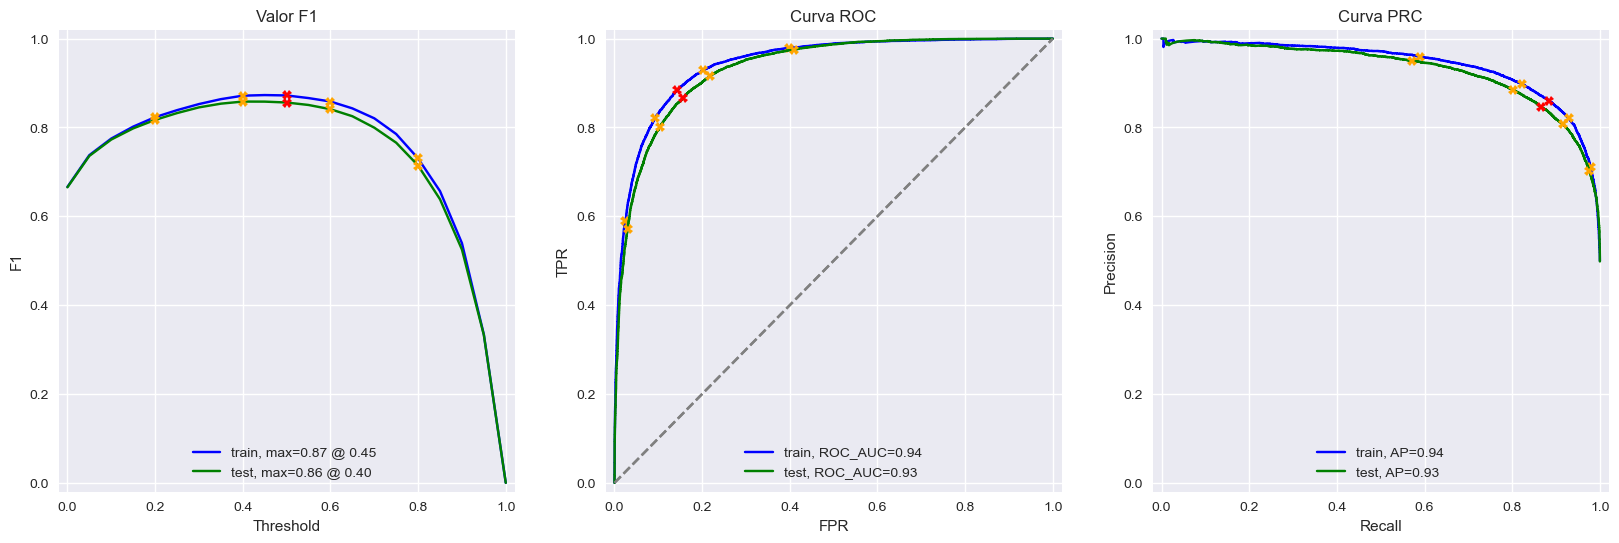

In [41]:
# Evaluar el Modelo 3 - spaCy, TF-IDF y LR
print('Evaluación del Modelo 3 - spaCy, TF-IDF y LR')
evaluate_model(model_2,  train_features_tf_idf_spacy, train_target, test_features_tf_idf_spacy, test_target)

**Podemos observar que:**

* La Exactitud del conjunto de entrenamiento es de 0.87 y en el conjunto de prueba es de 0.85 lo cual indica que el modelo no está sobreajustado.

* El F1 score es de 0.87  para el conjunto de entrenamiento y e 0.86 en el de prueba, esto indica que el modelo tiene un desempeño muy bueno entre la precisión y la exhaustividad(recall) esto se traduce a la capacidad de predicción del modelo y la capacidad de acertar en la mayoría de los verdaderos positivos.

* El valor APS de 0.94 y 0.93 para ambos conjuntos de datos reafirma al F1 score, mostrándonos que el modelo tiene una precisión muy alta, que se traduce a que si el modelo predice un valor, la probabilidad de que haya acertado es muy alta

* El valor AUC-ROC de 0.94 y 0.93 respectivamente nos muestra una medida "general" de que nuestro modelo tiene un desempeño excelente a la hora de distinguir entre clases positivas y negativas

**En general el modelo utilizando Spacy tuvo un desempeño "ligeramente" menor al modelo NLTK, sin embargo es tan pequeño que podría pasar como despreciable, ambos modelos tienen un muy buen desempeño**

## Modelo 4 SpaCY, TF-IDF + LGBMClassifier

In [42]:
from lightgbm import LGBMClassifier

In [43]:
model_3 = LGBMClassifier(class_weight='balanced', random_state=12345)
model_3.fit(train_features_tf_idf_spacy, train_target)

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 106: invalid start byte


[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210008
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


Evaluación del Modelo 4 - spaCy, TF-IDF + LGBMClassifier


c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,train,test
Exactitud,0.90,0.84
F1,0.90,0.84
APS,0.97,0.92
ROC AUC,0.97,0.92


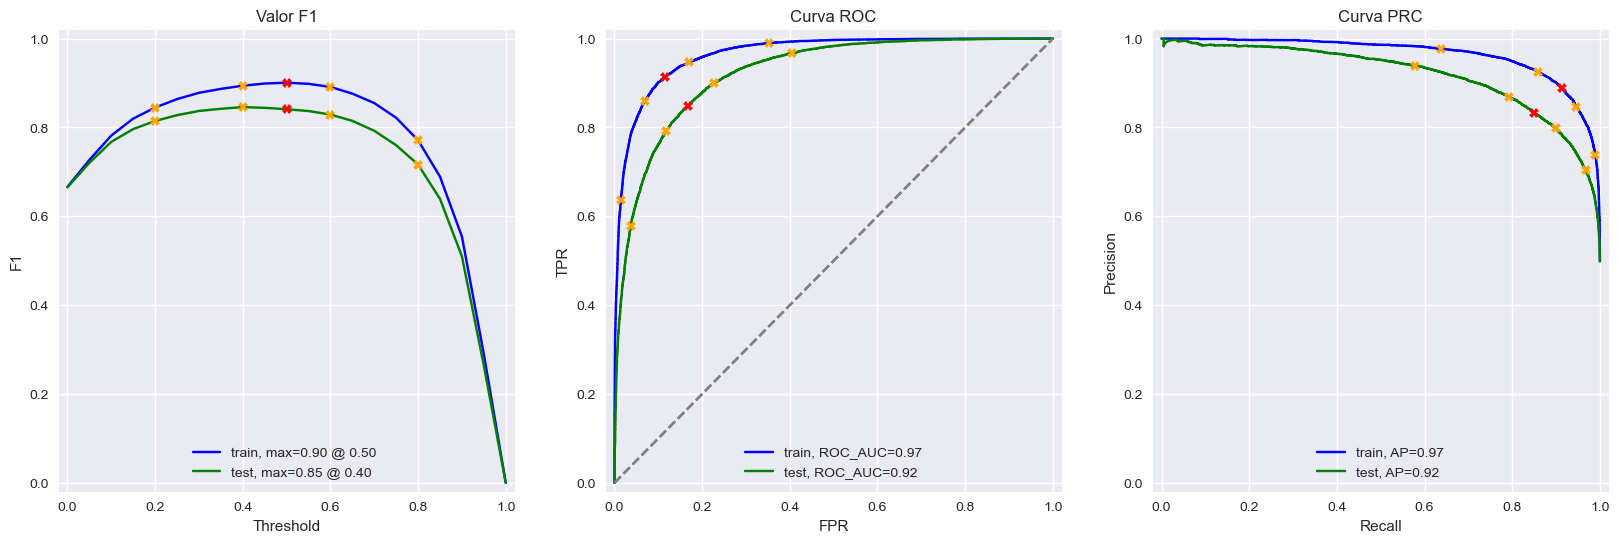

In [44]:
# Evaluar el Modelo 4 - spaCy, TF-IDF + LGBMClassifier
print('Evaluación del Modelo 4 - spaCy, TF-IDF + LGBMClassifier')
evaluate_model(model_3,  train_features_tf_idf_spacy, train_target, test_features_tf_idf_spacy, test_target)

**Podemos observar que:**

* La Exactitud del conjunto de entrenamiento es de 0.90 y en el conjunto de prueba es de 0.84 lo cual indica que el modelo no está sobreajustado.

* El F1 score es de 0.90  para el conjunto de entrenamiento y e 0.84 en el de prueba, esto indica que el modelo tiene un desempeño muy bueno entre la precisión y la exhaustividad(recall) esto se traduce a la capacidad de predicción del modelo y la capacidad de acertar en la mayoría de los verdaderos positivos.

* El valor APS de 0.96 y 0.92 para ambos conjuntos de datos reafirma al F1 score, mostrándonos que el modelo tiene una precisión muy alta, que se traduce a que si el modelo predice un valor, la probabilidad de que haya acertado es muy alta

* El valor AUC-ROC de 0.97 y 0.92 respectivamente nos muestra una medida "general" de que nuestro modelo tiene un desempeño excelente a la hora de distinguir entre clases positivas y negativas

**En general el modelo LGBM Classifier mostró un desempeño muy bueno en la tarea de clasificación de reseñas, vemos una ligera disminución generalizada en las métricas del conjunto de prueba en relación a los otros dos modelos (NLTK-Spacy + Logistic Regression), no considero que estas diferencias determinen un sobreajuste del modelo, sin embargo se podría buscar implementar estrategias de ajuste de hiperparámetros para verificar si el modelo presenta un mejor desempeño.**

## Modelo 4.1 SpaCY, TF-IDF + Ensamblaje de modleos voting classifier (LGBMClassifier + Random Forest Classifier + LogisticRegression)


**Decidimos utilizar esta estrategia para buscar una mejora en el F1 score y aumentarlo al umbral deseado (0.85).**

Con esta estrategia, mediante el Voting Classifier combinamos las bondades de los tres modelos:
* LGBM es muy bueno para capturar relaciones complejas y no lineales
* Random Forest Classifier es robusto a sobreajuste y bueno para manejar datos con muchas características
* Logistic Regression es simple y efectivo para relaciones lineales y proporciona probabilidades de clase interpretables

**Utilizamos las predicciones finales de los tres modelos y mediante el promedio de las probabilidades de clase (voting='soft') logramos aumentar el F1 score (así como también el desempeño en el resto de las métricas)**

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 210008
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Evaluación del Modelo 4.1 - spaCy, TF-IDF + Ensamblaje de modelos voting classifier


c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,train,test
Exactitud,0.95,0.85
F1,0.95,0.85
APS,0.99,0.93
ROC AUC,0.99,0.93


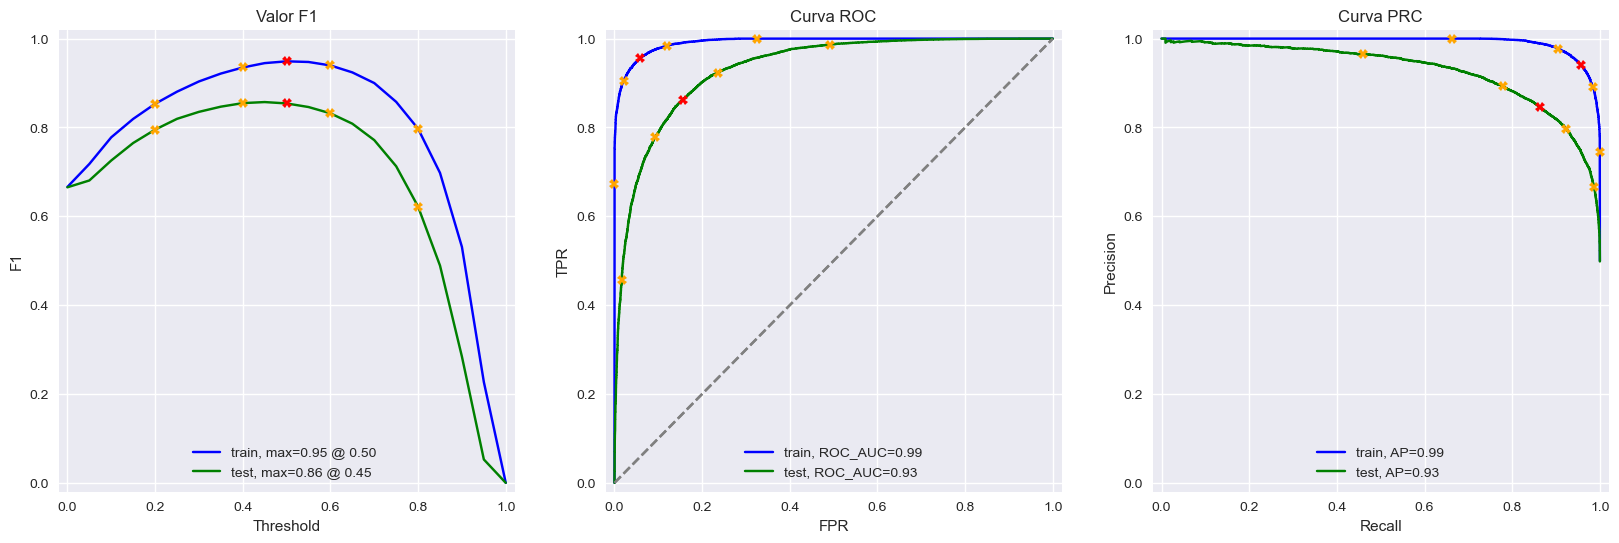

In [46]:
model1 = LGBMClassifier(class_weight='balanced' ,random_state=12345)
model2 = RandomForestClassifier(random_state=12345)
model3 = LogisticRegression(random_state=12345)

ensemble_model = VotingClassifier(estimators=[
    ('lgbm', model1),
    ('rf',model2),
    ('lr',model3)
], voting='soft')

ensemble_model.fit(train_features_tf_idf_spacy,train_target)

# Evaluar el Modelo 4.1 - spaCy, TF-IDF y LR
print('Evaluación del Modelo 4.1 - spaCy, TF-IDF + Ensamblaje de modelos voting classifier')
evaluate_model(ensemble_model,  train_features_tf_idf_spacy, train_target, test_features_tf_idf_spacy, test_target)


**Podemos observar que:**

* La Exactitud del conjunto de entrenamiento es de 0.95 y en el conjunto de prueba es de 0.85 lo cual indica que el modelo podría acercarse a un riesgo de sobreajuste.

* El F1 score es de 0.95 para el conjunto de entrenamiento y e 0.85 en el de prueba, esto indica que el modelo tiene un desempeño muy bueno entre la precisión y la exhaustividad(recall) esto se traduce a la capacidad de predicción del modelo y la capacidad de acertar en la mayoría de los verdaderos positivos.

* El valor APS de 0.99 y 0.93 para ambos conjuntos de datos reafirma al F1 score, mostrándonos que el modelo tiene una precisión muy alta, que se traduce a que si el modelo predice un valor, la probabilidad de que haya acertado es muy alta

* El valor AUC-ROC de 0.99 y 0.93 respectivamente nos muestra una medida "general" de que nuestro modelo tiene un desempeño excelente a la hora de distinguir entre clases positivas y negativas.


**En general el desempeño del modelo con el conjunto de prueba mejoró, sin embargo la diferencia de las métricas entre el conjunto de prueba y el conjunto de entrenamiento incrementaron, por lo tanto podríamos estarnos enfrentando a un sobreajuste del modelo, tomando en cuenta que una estrategia GridSearchCV tiene un costo computacional "alto" (con tiempos computacionales mayores a 10 minutos) en relación al modelo Voting Classifier, podríamos asumir el riesgo de las diferencias en las métricas entre los conjuntos de entrenamiento y prueba, a fin de mejorar el F1 Score tal como es el objetivo de este proyecto.**

## Modelo 9 - Bert

In [47]:
display(df_reviews_train.shape)
display(train_target.shape)
display(df_reviews_test.shape)
display(test_target.shape)

(23796, 19)

(23796,)

(23533, 19)

(23533,)

In [48]:
# Obtener el 10% de los datos para el entrenamiento
df_reviews_train_sample = df_reviews_train.sample(frac=0.1, random_state=42)
target_train_sample = train_target.loc[df_reviews_train_sample.index]


#Obtener el 10% de los datos para prueba
df_reviews_test_sample = df_reviews_test.sample(frac=0.1, random_state=42)
target_test_sample = test_target.loc[df_reviews_test_sample.index]

display(df_reviews_train_sample.shape)
display(df_reviews_test_sample.shape)


(2380, 19)

(2353, 19)

### Tokenización y obtención de IDs
Convirtiendo de texto -> tokens -> IDs

In [49]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
config = BertConfig.from_pretrained('bert-base-uncased', force_download=True)
model = BertModel.from_pretrained('bert-base-uncased', force_download=True)

In [62]:
#Función para tokenizar y obtener embeddings (features)
def BERT_text_to_embeddings(texts, max_length=512, batch_size = 100, force_device=None, disable_progress_bar = False):
    ids_list = []
    attention_mask_list = []


    #Tokenización
    for input_text in texts:
        ids = tokenizer.encode(
            #Se convierte a lowercase
            input_text.lower(),
            #añade tokens especiales (SEP , CLS )
            add_special_tokens = True,
            truncation = True,
            max_length = max_length
        )
        #Crea padding (ceros fillers)
        padded= np.array(ids +[0]* (max_length - len(ids)))
        #Crea attention mask
        attention_mask = np.where(padded !=0, 1 , 0)
        #append a cada text a la lista
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)

    
    #----Obtención de Embeddings (Features)-----------------------------------------
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo: {device}')
    
    #Lista vacía para los insertados
    embeddings = []

    num_batches = math.ceil(len(ids_list) / batch_size )

    for i in tqdm(range(num_batches), disable= disable_progress_bar ):
        start = batch_size * i
        end = batch_size * (i+1)

        #Convertir la lista de arrays en un solo np.array 2D
        ids_np = np.array(ids_list[start:end])            # (batch, seq_len)
        att_np = np.array(attention_mask_list[start:end]) # (batch, seq_len)

        #Crea tensores directamente desde el array y enviarlos al device
        #Unión de vectores de ids(de tokens) a un tensor
        #Crea tensores de batches de tamaño 100 ej: ids_list [0:101, 1:102, ..., etc.]
        ids_batch = torch.tensor(ids_np, dtype = torch.long, device=device) #[101, 2023, 2003, 1037, 3978, 102]

        #Crea el tensor de batches de attention_mask
        attention_batch = torch.tensor(att_np, dtype = torch.long, device = device)

        #Obteniendo los embeddings (insertados) para el batch
        with torch.no_grad():
            model.eval()
            batch_embeddings = model(
                ids_batch,
                attention_mask = attention_batch
            )
        
        #Extrayendo el primer elemento de la salida del modelo BERT (last_hidden_state)
        last_hidden_state = batch_embeddings[0]

        #Extrayendo el [CLS] Token, siempre en la posición0
        # Esto da un tensor de forma (batch, seq_len, hidden)
        cls_embeddings = last_hidden_state[:,0,:] #(batch,hidden)

        # Guardar en CPU para no llenar VRAM y convertimos a numpy()
        embeddings.append(cls_embeddings.cpu().numpy())
        
        #
        
    

    #-------Retornamos los embeddings apilados (que serán los features    
    return np.vstack(embeddings)


### Obtención de embeddings (features)

In [51]:
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
train_featureS_9 = BERT_text_to_embeddings(df_reviews_train_sample['review'], force_device='cpu')
test_features_9 = BERT_text_to_embeddings(df_reviews_test_sample['review'], force_device='cpu')

Uso del dispositivo: cpu


100%|██████████| 24/24 [37:53<00:00, 94.74s/it]


Uso del dispositivo: cpu


100%|██████████| 24/24 [38:25<00:00, 96.08s/it] 


In [52]:
train_features_9  = train_featureS_9

77 min con CPU (ojo)

In [55]:
# Guardando embeddings (features) en un archivo comprimido
np.savez_compressed('features_9.npz', train_features_9 = train_features_9, test_features_9= test_features_9)

#Y cargar...
with np.load('features_9.npz') as data:
    train_features_9 = data['train_features_9']
    test_features_9 = data['test_features_9']

print("Dimensiones de características de entrenamiento:", train_features_9.shape)
print("Dimensiones de características de prueba:", test_features_9.shape)

Dimensiones de características de entrenamiento: (2380, 768)
Dimensiones de características de prueba: (2353, 768)


### Modelo LR

In [71]:
model_lr_bert= LogisticRegression(max_iter=1500)

model_lr_bert.fit(train_featureS_9, target_train_sample)
bert_predictions = model_lr_bert.predict(test_features_9)


Evaluación del Modelo 9 - BERT:


,train,test
Exactitud,0.93,0.84
F1,0.93,0.84
APS,0.98,0.92
ROC AUC,0.98,0.91


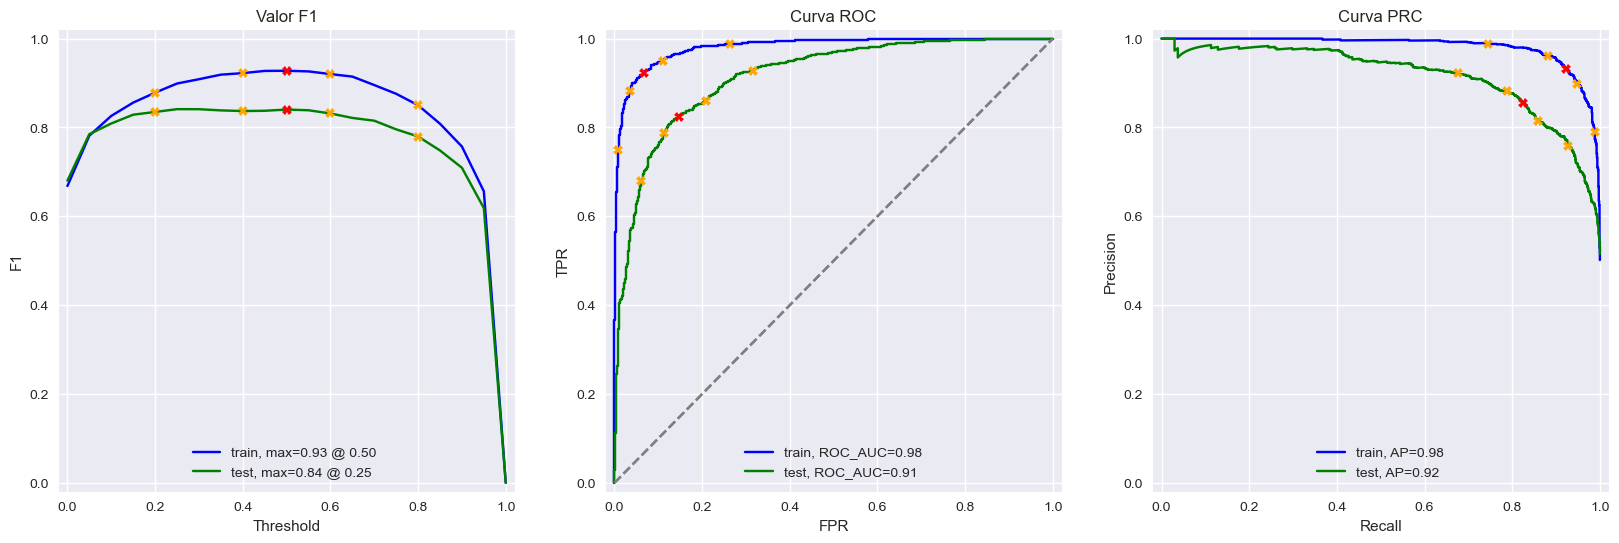

In [72]:
# Evaluar el Modelo 9 - BERT
print("Evaluación del Modelo 9 - BERT:")
evaluate_model(model_lr_bert, train_featureS_9, target_train_sample, test_features_9, target_test_sample)

**Podemos observar que:**

* La Exactitud del conjunto de entrenamiento es de 0.93 y en el conjunto de prueba es de 0.84 lo cual indica que el modelo podría acercarse a un riesgo de sobreajuste.

* El F1 score es de 0.93 para el conjunto de entrenamiento y e 0.84 en el de prueba, esto indica que el modelo tiene un desempeño muy bueno entre la precisión y la exhaustividad(recall) esto se traduce a la capacidad de predicción del modelo y la capacidad de acertar en la mayoría de los verdaderos positivos.

* El valor APS de 0.98 y 0.92 para ambos conjuntos de datos reafirma al F1 score, mostrándonos que el modelo tiene una precisión muy alta, que se traduce a que si el modelo predice un valor, la probabilidad de que haya acertado es muy alta

* El valor AUC-ROC de 0.98 y 0.92 respectivamente nos muestra una medida "general" de que nuestro modelo tiene un desempeño muy bueno a la hora de distinguir entre clases positivas y negativas.


**En general el desempeño del modelo BERT fue bueno, si bien no llega a la métrica deseada de F1 Score >= 0.85, podríamos asumir que parte del desempeño es debido al tamaño tan reducido de los conjuntos de entrenamiento y prueba, sugeriríamos en siguientes iteraciones:**
* Poder entrenar y probar el modelo con el conjunto completo de datos
* Probar con ajuste de hiperparámetros tales como
    * Tasa de aprendizaje
    * Tamaño de lote
    * Número de épocas
    * Warmup setups
    * entre otros


# Probando modelos con **Mis reseñas**

## Definición de dataset (reseñas)

In [73]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.',
    'awful',
    'amazing',
    'meh',
    'would watch again only on sundays'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = ...# <escribe aquí la misma lógica de normalización que para el conjunto de datos principal>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",Ellipsis
1,"Well, I was bored and felt asleep in the middl...",Ellipsis
2,I was really fascinated with the movie,Ellipsis
3,Even the actors looked really old and disinter...,Ellipsis
4,I didn't expect the reboot to be so good! Writ...,Ellipsis
5,"The movie had its upsides and downsides, but I...",Ellipsis
6,What a rotten attempt at a comedy. Not a singl...,Ellipsis
7,Launching on Netflix was a brave move & I real...,Ellipsis
8,awful,Ellipsis
9,amazing,Ellipsis


## Preprocesamiento de reseñas

In [83]:
#Creando patrón regex para eliminar signos de puntuación y dígitos
pattern = r'[^a-zA-Z\s]'

#Aplicando lambda
my_reviews['review_norm'] = my_reviews['review'].apply(lambda x : re.sub(pattern, ' ', x).strip().lower()  )
#aplicando regex para hacer todos los espacios en blanco uno solo
my_reviews['review_norm'] = my_reviews['review_norm'].apply(lambda x : re.sub(r'\s+', ' ',x))


#Procesando reviews con NLTK
my_reviews['review_nltk'] = my_reviews['review_norm'].progress_apply(preprocess_text_nltk)

my_reviews['review_spacy'] = my_reviews['review_norm'].progress_apply(text_preprocessing_3)

my_reviews

100%|██████████| 12/12 [00:00<00:00, 25.92it/s]


,review,review_norm,review_nltk,review_spacy
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie,i do not simply like it not my kind of movie,simply like kind movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...,well i be bore and felt asleep in the middle o...,bored feel asleep middle movie
2,I was really fascinated with the movie,i was really fascinated with the movie,i be really fascinate with the movie,fascinate movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...,even the actor look really old and disinterest...,actor look old disinterested get pay movie sou...
4,I didn't expect the reboot to be so good! Writ...,i didn t expect the reboot to be so good write...,i didn t expect the reboot to be so good write...,didn t expect reboot good writer care source m...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...,the movie have it upside and downside but i fe...,movie upside downside feel like overall s dece...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...,what a rotten attempt at a comedy not a single...,rotten attempt comedy single joke land act ann...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...,launch on netflix be a brave move i really app...,launch netflix brave appreciate able binge epi...
8,awful,awful,awful,awful
9,amazing,amazing,amaze,amazing


## Modelo 2 NLTK + TF-IDF + LR

In [102]:
texts = my_reviews['review_nltk']

texts_transformed = tfidf_vectorizer.transform(texts)

my_reviews_pred_prob = model_1.predict_proba(texts_transformed)[:,1] # [0.0461, 0.4650, 0.6706, 0.9447, ...]

for i, review in enumerate(texts.str.slice(0,100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: {review}')


0.05: i do not simply like it not my kind of movie
0.47: well i be bore and felt asleep in the middle of the movie
0.67: i be really fascinate with the movie
0.94: even the actor look really old and disinterested and they get pay to be in the movie what a soulless
0.92: i didn t expect the reboot to be so good writer really care about the source material
0.81: the movie have it upside and downside but i feel like overall it s a decent flick i could see myself
0.63: what a rotten attempt at a comedy not a single joke land everyone act annoy and loud even kid win t 
0.46: launch on netflix be a brave move i really appreciate be able to binge on episode after episode of t
0.92: awful
0.47: amaze
0.47: meh
0.20: would watch again only on sunday


## Modelo 3 SpaCy + TF-IDF + LR

In [112]:
texts = my_reviews['review_spacy']
#Lematización , tokenización , eliminación de stopwords
texts = texts.progress_apply(text_preprocessing_3)
#Vectorización de textos
texts_transformed = tfidf_vectorizer.transform(texts)

my_reviews_pred_prob = model_2.predict_proba(texts_transformed)[:, 1]

print('--')
for i, review in enumerate(texts.str.slice(0,100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: {review}')


100%|██████████| 12/12 [00:00<00:00, 229.93it/s]

--
0.19: simply like kind movie
0.31: bored feel asleep middle movie
0.40: fascinate movie
0.05: actor look old disinterested pay movie soulless cash grab
0.18: didn t expect reboot good writer care source material
0.38: movie upside downside feel like overall s decent flick
0.03: rotten attempt comedy single joke land act annoying loud kid win t like
0.95: launch netflix brave appreciate able binge episode episode exciting intelligent new drama
0.00: awful
0.99: amazing
0.48: meh
0.48: watch sunday


## Modelo 4 SpaCY, TF-IDF + LGBMClassifier

In [113]:
#----- mismo procedimiento pero lo colocamos para obviar
texts = my_reviews['review_spacy']
#Lematización , tokenización , eliminación de stopwords
texts = texts.progress_apply(text_preprocessing_3)
#Vectorización de textos
texts_transformed = tfidf_vectorizer.transform(texts)
#-----------

my_reviews_pred_prob = model_3.predict_proba(texts_transformed)[:, 1]

print('--')
for i, review in enumerate(texts.str.slice(0,100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: {review}')

100%|██████████| 12/12 [00:00<00:00, 36.23it/s]
c:\Users\omarh\anaconda3\envs\proyecto_nlp\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--
0.41: simply like kind movie
0.62: bored feel asleep middle movie
0.62: fascinate movie
0.34: actor look old disinterested pay movie soulless cash grab
0.60: didn t expect reboot good writer care source material
0.50: movie upside downside feel like overall s decent flick
0.25: rotten attempt comedy single joke land act annoying loud kid win t like
0.78: launch netflix brave appreciate able binge episode episode exciting intelligent new drama
0.11: awful
0.87: amazing
0.64: meh
0.64: watch sunday


## Modelo 9 BERT

In [119]:
my_reviews.iloc[4]['review']

"I didn't expect the reboot to be so good! Writers really cared about the source material"

In [116]:
#Definiendo corpus
texts = my_reviews['review_norm']

#Generando embeddings
my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

#generando probabilidades
my_reviews_pred_prob = model_lr_bert.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0,100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: {review}')



0.11: i did not simply like it not my kind of movie
0.00: well i was bored and felt asleep in the middle of the movie
0.86: i was really fascinated with the movie
0.00: even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.07: i didn t expect the reboot to be so good writers really cared about the source material
0.94: the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.08: what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.82: launching on netflix was a brave move i really appreciate being able to binge on episode after episo
0.40: awful
0.96: amazing
0.75: meh
0.66: would watch again only on sundays


# Conclusiones


**Pudimos observar que:**
* Incrementamos el F1 Score del modelo Dummy pasando de 0.67 a un mínimo de 0.84 (y superiores)
* Los modelos de Regressión Logística NLTK y Spacy ambos mediante (TF-IDF) tuvieron el mejor desempeño del F1 Score mostrando un valor de 0.86
* El mejor desempeño generalizado de las métricas fue presentado por el modelo de Voting Classifier combinando LGBMClassifier, Random Forest Classifier y LogisticRegression mostrando las siguientes métricas en el conjunto de prueba:
    * Exactitud = 0.85
    * F1 = 0.85
    * APS = 0.93
    * ROC-AUC = 0.93

* El modelo BERT mostró un desempeño ligeramente menor, sin embargo se justifica debido a que utilizamos apenas el 10% de los datos totales para su funcionamiento, será interesante implementar las recomendaciones ya mencionadas:
    * Poder entrenar y probar el modelo con el conjunto completo de datos
    * Probar con ajuste de hiperparámetros tales como
        * Tasa de aprendizaje
        * Tamaño de lote
        * Número de épocas
        * Warmup setups
        * entre otros
     
**El procesamiento de datos en lenguaje natural fue un reto muy interesante, destaco las diferencias de como se lematizan las palabras entre Spacy y NLTK, así como la robustez del modelo BERT, sin duda será muy interesante seguir trabajando con este tipo de modelos.**